# **Importing required modules**

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

# **General functions for plotting**

In [34]:
# Format of parameter "points": [[x1, y1], [x2, y2], [x3, y3],..., [x8, y8]]
# Parameter "points" represents cuboid (first four points are corners of lower base of cuboid, and last four points are corners of upper base of cuboid).
def configure_coordinates(points):
  base_1 = np.array(points[:4])
  base_2 = np.array(points[4:])

  [base_1_x, base_1_y, base_1_z] = base_1.T.tolist()
  [base_2_x, base_2_y, base_2_z] = base_2.T.tolist()

  base_1_x.append(base_1[0][0])
  base_1_y.append(base_1[0][1])
  base_1_z.append(base_1[0][2])

  base_2_x.append(base_2[0][0])
  base_2_y.append(base_2[0][1])
  base_2_z.append(base_2[0][2])

  return [[base_1_x, base_1_y, base_1_z], [base_2_x, base_2_y, base_2_z]]

In [35]:
def plot_3d_shape(points_1, points_2 = [], x_limit = [0, 40], y_limit = [0, 40], z_limit = [0, 40], color_1 = "blue", color_2 = "red"):
  [base_1_1, base_2_1] = configure_coordinates(points_1)

  figure = plt.figure()
  axes = plt.axes(projection = "3d")

  axes.plot3D(base_1_1[0], base_1_1[1], base_1_1[2], color = color_1)
  axes.plot3D(base_2_1[0], base_2_1[1], base_2_1[2], color = color_1)

  for i in range(len(base_1_1[0])):
    axes.plot3D([base_1_1[0][i], base_2_1[0][i]], [base_1_1[1][i], base_2_1[1][i]], [base_1_1[2][i], base_2_1[2][i]], color = color_1)

  plt.xlim(x_limit)
  plt.ylim(y_limit)
  axes.set_zlim(z_limit)

  if points_2:
     [base_1_2, base_2_2] = configure_coordinates(points_2)

     axes.plot3D(base_1_2[0], base_1_2[1], base_1_2[2], color = color_2)
     axes.plot3D(base_2_2[0], base_2_2[1], base_2_2[2], color = color_2)

     for i in range(len(base_1_2[0])):
      axes.plot3D([base_1_2[0][i], base_2_2[0][i]], [base_1_2[1][i], base_2_2[1][i]], [base_1_2[2][i], base_2_2[2][i]], color = color_2)

  plt.show()

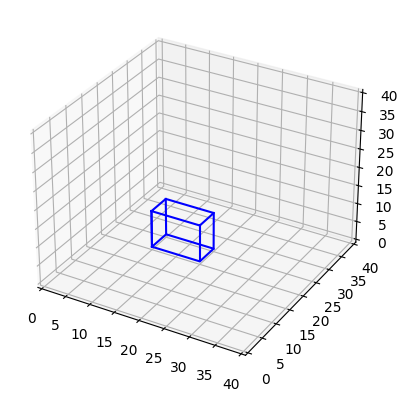

In [36]:
points = [[10, 20, 0], [20, 20, 0], [20, 25, 0], [10, 25, 0], [10, 20, 10], [20, 20, 10], [20, 25, 10], [10, 25, 10]]

plot_3d_shape(points)

# **Translation**

In [37]:
def translate_point(x, y, z, x_translation, y_translation, z_translation):
  translation_matrix = np.array([[1, 0, 0, x_translation], [0, 1, 0, y_translation], [0, 0, 1, z_translation], [0, 0, 0, 1]])
  point_vector = np.array([x, y, z, 1])
  translated_point_vector = translation_matrix @ point_vector
  return translated_point_vector[:3]

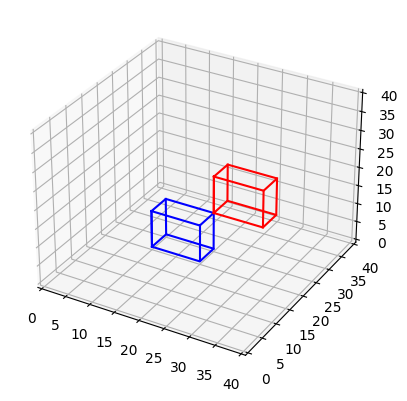

In [38]:
x_translation = 10
y_translation = 5
z_translation = 10

translated_points = []

for point in points:
  translated_points.append(translate_point(point[0], point[1], point[2], x_translation, y_translation, z_translation))

plot_3d_shape(points, translated_points)

# **Rotation**

## **Rotation about the X-axis**

In [39]:
def rotate_point_x_axis(x, y, z, rotation_angle):
  rotation_matrix = np.array([[1, 0, 0, 0], [0, math.cos(rotation_angle), -math.sin(rotation_angle), 0], [0, math.sin(rotation_angle), math.cos(rotation_angle), 0], [0, 0, 0, 1]])
  point_vector = np.array([x, y, z, 1])
  rotated_point_vector = rotation_matrix @ point_vector
  return rotated_point_vector[:3]

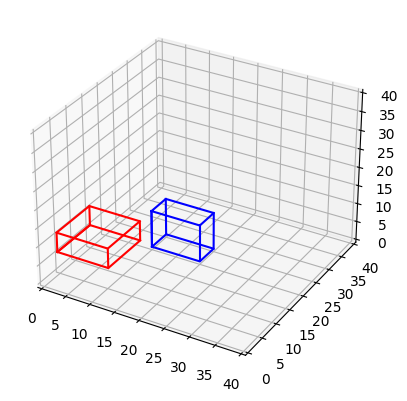

In [40]:
rotation_angle = math.pi / 2

rotated_points_x_axis = []

for point in points:
  rotated_points_x_axis.append(rotate_point_x_axis(point[0], point[1], point[2], rotation_angle))

plot_3d_shape(points, rotated_points_x_axis)

## **Rotation about the Y-axis**

In [41]:
def rotate_point_y_axis(x, y, z, rotation_angle):
  rotation_matrix = np.array([[math.cos(rotation_angle), 0, math.sin(rotation_angle), 0], [0, 1, 0, 0], [-math.sin(rotation_angle), 0, math.cos(rotation_angle), 0], [0, 0, 0, 1]])
  point_vector = np.array([x, y, z, 1])
  rotated_point_vector = rotation_matrix @ point_vector
  return rotated_point_vector[:3]

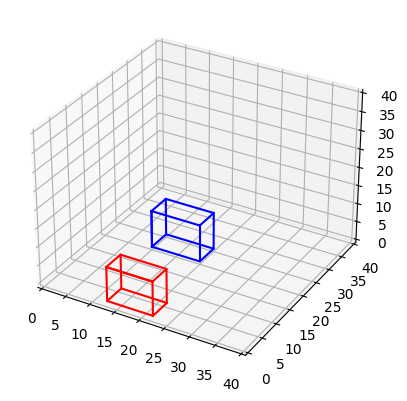

In [42]:
rotation_angle = math.pi / 2

rotated_points_y_axis = []

for point in points:
  rotated_points_y_axis.append(rotate_point_y_axis(point[0], point[1], point[2], rotation_angle))

plot_3d_shape(points, rotated_points_y_axis)

## **Rotation about the Z-axis**

In [43]:
def rotate_point_z_axis(x, y, z, rotation_angle):
  rotation_matrix = np.array([[math.cos(rotation_angle), -math.sin(rotation_angle), 0, 0], [math.sin(rotation_angle), math.cos(rotation_angle), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
  point_vector = np.array([x, y, z, 1])
  rotated_point_vector = rotation_matrix @ point_vector
  return rotated_point_vector[:3]

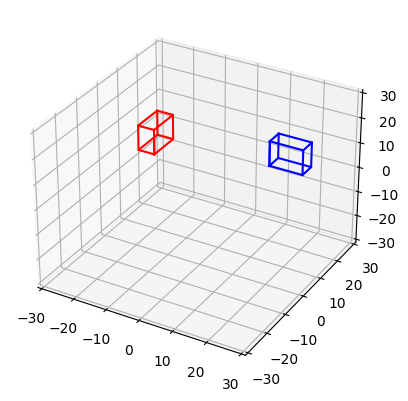

In [44]:
rotation_angle = math.pi / 2

rotated_points_z_axis = []

for point in points:
  rotated_points_z_axis.append(rotate_point_z_axis(point[0], point[1], point[2], rotation_angle))

plot_3d_shape(points, rotated_points_z_axis, x_limit = [-30, 30], y_limit = [-30, 30], z_limit = [-30, 30])

## **Rotation about custom axis which contains the Origin**

In [45]:
def rotate_point_origin_custom(point, line_angle_1, line_angle_2, rotation_angle):
  new_point = rotate_point_x_axis(point[0], point[1], point[2], line_angle_1)
  new_point = rotate_point_y_axis(new_point[0], new_point[1], new_point[2], line_angle_2)
  new_point = rotate_point_z_axis(new_point[0], new_point[1], new_point[2], rotation_angle)
  new_point = rotate_point_y_axis(new_point[0], new_point[1], new_point[2], -line_angle_2)
  new_point = rotate_point_x_axis(new_point[0], new_point[1], new_point[2], -line_angle_1)
  return new_point[:3]

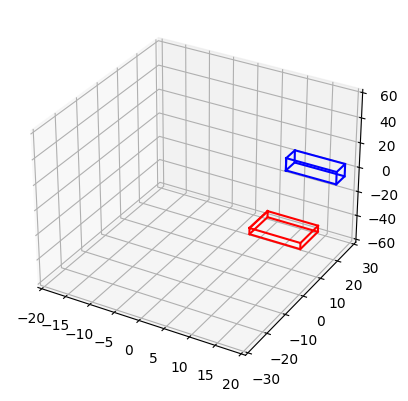

In [47]:
rotation_angle = math.pi/2
line_angle_1 = 0
line_angle_2 = math.pi/2

rotated_points = []

for point in points:
  rotated_points.append(rotate_point_origin_custom(point, line_angle_1, line_angle_2, rotation_angle))

plot_3d_shape(points, rotated_points, [-20, 20], [-30, 30], [-60, 60])

## **Rotation about custom axis**

In [48]:
def rotate_point_custom(point, line_angle_1, line_angle_2, rotation_angle, rotation_point):
  new_point = translate_point(point[0], point[1], point[2], -rotation_point[0], -rotation_point[1], -rotation_point[2])
  new_point = rotate_point_origin_custom(point, line_angle_1, line_angle_2, rotation_angle)
  return new_point

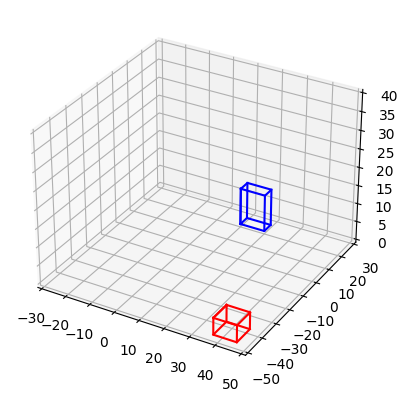

In [49]:
rotation_angle = math.pi/2
line_angle_1 = 0
line_angle_2 = math.pi/2
rotation_point = [10, 20, 0]

rotated_points = []

for point in points:
  rotated_points.append(rotate_point_custom(point, line_angle_1, line_angle_2, rotation_angle, rotation_point))

plot_3d_shape(points, rotated_points, [-30, 50], [-50, 30])

# **Shearing**

## **Shearing in X-axis direction**

In [50]:
def shear_point_in_x_direction(x, y, z, shearing_coefficient_y, shearing_coefficient_z):
  shearing_matrix = np.array([[1, 0, 0, 0], [shearing_coefficient_y, 1, 0, 0], [shearing_coefficient_z, 0, 1, 0], [0, 0, 0, 1]])
  point_vector = np.array([x, y, z, 1])
  sheared_point_vector = shearing_matrix @ point_vector
  return sheared_point_vector[:3]

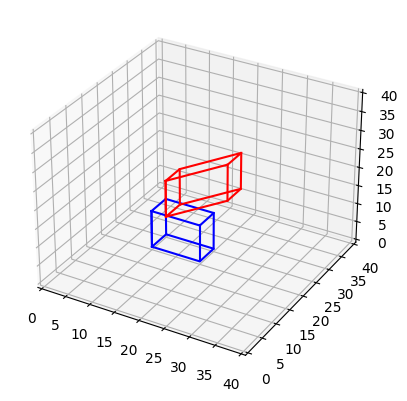

In [51]:
shearing_coefficient_y = 0.5
shearing_coefficient_z = 0.5

sheared_points = []

for point in points:
  sheared_points.append(shear_point_in_x_direction(point[0], point[1], point[2], shearing_coefficient_y, shearing_coefficient_z))

plot_3d_shape(points, sheared_points)

## **Shearing in Y-axis direction**

In [52]:
def shear_point_in_y_direction(x, y, z, shearing_coefficient_x, shearing_coefficient_z):
  shearing_matrix = np.array([[1, shearing_coefficient_x, 0, 0], [0, 1, 0, 0], [0, shearing_coefficient_z, 1, 0], [0, 0, 0, 1]])
  point_vector = np.array([x, y, z, 1])
  sheared_point_vector = shearing_matrix @ point_vector
  return sheared_point_vector[:3]

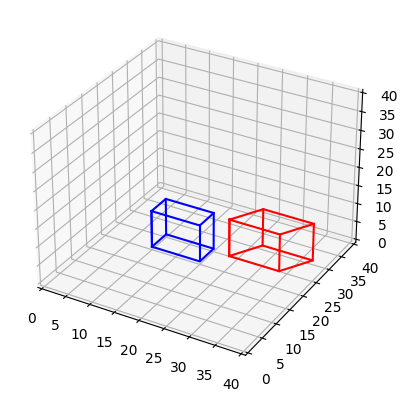

In [53]:
shearing_coefficient_x = 0.8
shearing_coefficient_z = 0.2

sheared_points = []

for point in points:
  sheared_points.append(shear_point_in_y_direction(point[0], point[1], point[2], shearing_coefficient_x, shearing_coefficient_z))

plot_3d_shape(points, sheared_points)

# **Scaling**

In [54]:
def scale_point(x, y, z, x_scaling, y_scaling, z_scaling):
  scaling_matrix = np.array([[x_scaling, 0, 0, 0], [0, y_scaling, 0, 0], [0, 0, z_scaling, 0], [0, 0, 0, 1]])
  point_vector = np.array([x, y, z, 1])
  scaled_point_vector = scaling_matrix @ point_vector
  return scaled_point_vector[:3]

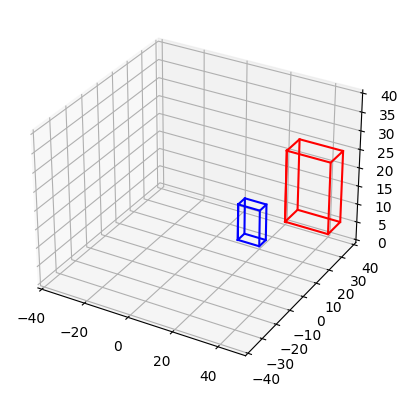

In [58]:
x_scaling = 2
y_scaling = 2
z_scaling = 2

scaled_points = []

for point in points:
  scaled_points.append(scale_point(point[0], point[1], point[2], x_scaling, y_scaling, z_scaling))

plot_3d_shape(points, scaled_points, x_limit = [-40, 50], y_limit = [-40, 40])